In [1]:
# Import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
df = pd.read_csv("cleaned.csv")

# Drop unnecessary features
df = df.drop(['anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking'], axis=1)

# Feature variable
X = df.drop(columns=['DEATH_EVENT'])

# Target Variable
y = df['DEATH_EVENT']

In [3]:
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X,
                                y,stratify=y,
                                test_size=0.3,
                                random_state=42)

In [4]:
#scaler = MinMaxScaler()
scaler = StandardScaler()
X_train_70_scaled = scaler.fit_transform(X_train_70)
X_test_30_scaled = scaler.transform(X_test_30)

Accuracy of logistic regression classifier using 70% training data:  0.8333
F1 score for 70% training data 0.717 



/Users/asma/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


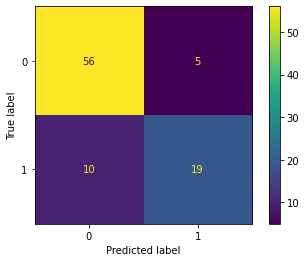

In [5]:
# Instantiate the classifier
logreg = LogisticRegression(random_state=42)

# Fit the classifier
logreg=logreg.fit(X_train_70_scaled, y_train_70)

# Predict instances from the test set
logreg_y_pred = logreg.predict(X_test_30_scaled)

logreg_accuracy = round(logreg.score(X_test_30_scaled, y_test_30), 4)
logreg_f1_score = round(f1_score(y_test_30, logreg_y_pred), 4)

# Print the accuracy score of the model
print("Accuracy of logistic regression classifier using 70% training data: ", logreg_accuracy)

# Print the F1 score
print("F1 score for 70% training data", logreg_f1_score, "\n")

plot_confusion_matrix(logreg, X_test_30_scaled, y_test_30)

Accuracy of logistic regression classifier using 70% training data:  0.8111
F1 score for 70% training data 0.6792 



/Users/asma/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


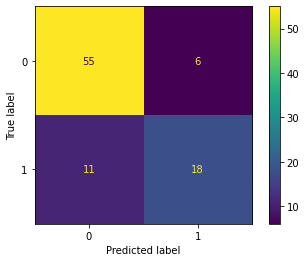

In [6]:
dt = DecisionTreeClassifier(random_state=42)

# Fit the classifier
dt= dt.fit(X_train_70_scaled, y_train_70)

dt_y_pred = dt.predict(X_test_30_scaled)

dt_accuracy = round(dt.score(X_test_30_scaled, y_test_30), 4)
dt_f1_score = round(f1_score(y_test_30, dt_y_pred), 4)

# Print the accuracy score of the model
print("Accuracy of logistic regression classifier using 70% training data: ", dt_accuracy)

# Print the F1 score
print("F1 score for 70% training data", dt_f1_score, "\n")

plot_confusion_matrix(dt, X_test_30_scaled, y_test_30) 

In [7]:
df.columns

Index(['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time',
       'DEATH_EVENT'],
      dtype='object')

Accuracy of logistic regression classifier using 70% training data:  0.8222
F1 score for 70% training data 0.7037 



/Users/asma/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


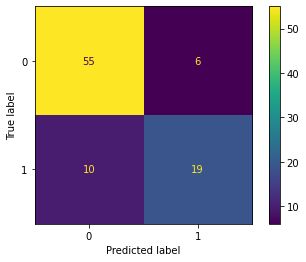

In [8]:
rf = RandomForestClassifier(random_state=42)

# Fit the classifier
rf=rf.fit(X_train_70_scaled, y_train_70)

rf_y_pred = rf.predict(X_test_30_scaled)

rf_accuracy = round(rf.score(X_test_30_scaled, y_test_30), 4)
rf_f1_score = round(f1_score(y_test_30, rf_y_pred), 4)

# Print the accuracy score of the model
print("Accuracy of logistic regression classifier using 70% training data: ", rf_accuracy)

# Print the F1 score
print("F1 score for 70% training data", rf_f1_score, "\n")
plot_confusion_matrix(rf, X_test_30_scaled, y_test_30) 

We expected decision tree and random forest to perform better than logistic regression.The reason behind this may be the features we picked based off the Pearson Coefficents.

# FEATURE SELECTION

We tried models that have feature_importances_. Random forest feature important is the most common way to detect features. Based of the feature importance of these models, I chose time, serum_creatine, and ejection_fraction since their importance is above 0.10. Previously, we have selected time, serum_creatine, and ejection_fraction, serum sodium, and age. We have dropped off age and serum sodium based on these observations.

In [13]:
df = pd.read_csv("cleaned.csv")
X = df.drop(columns=['DEATH_EVENT'])

# Target Variable
y = df['DEATH_EVENT']
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X,
                                y,stratify=y,
                                test_size=0.3,
                                random_state=42)

[0.06129579 0.01231638 0.08669576 0.01088548 0.12579056 0.01184544
 0.07006881 0.15405062 0.06618383 0.00813227 0.014376   0.37835906]


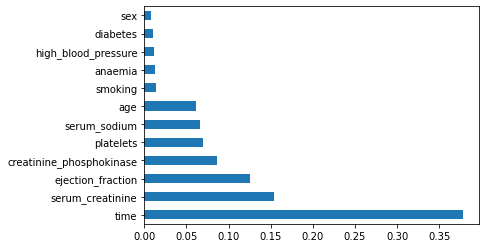

In [19]:
rf.fit(X_train_70,y_train_70)
print(rf.feature_importances_) 
feat_importances = pd.Series(rf.feature_importances_, index=X_train_70.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

[0.06763517 0.02553042 0.08225709 0.03007604 0.13549359 0.03082613
 0.06921631 0.14020333 0.08163028 0.02483046 0.025821   0.28648018]


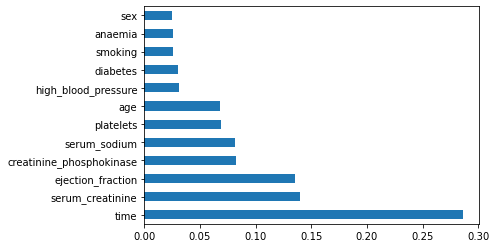

In [15]:
etc = ExtraTreesClassifier()
etc.fit(X_train_70,y_train_70)
print(etc.feature_importances_) 
feat_importances = pd.Series(etc.feature_importances_, index=X_train_70.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

[0.02989261 0.         0.17400497 0.01464508 0.04368704 0.
 0.03321296 0.09057279 0.05701122 0.01318058 0.         0.54379274]


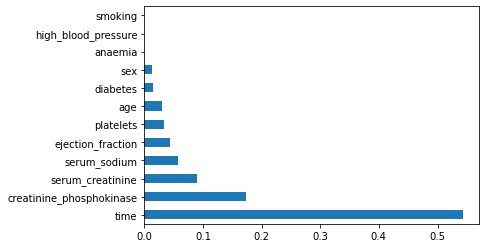

In [16]:
dt.fit(X_train_70,y_train_70)
print(dt.feature_importances_) 
feat_importances = pd.Series(dt.feature_importances_, index=X_train_70.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

[1.03359065e-02 2.74674981e-03 8.75039029e-02 5.50148975e-03
 1.14317837e-01 2.65167555e-09 4.67931216e-02 1.07019136e-01
 3.56609622e-02 4.23828835e-05 3.47428253e-03 5.86604226e-01]


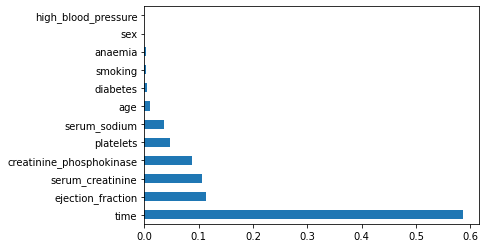

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train_70,y_train_70)
print(gbc.feature_importances_) 
feat_importances = pd.Series(gbc.feature_importances_, index=X_train_70.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()